## Brain Mask Visualization

In [1]:
import sys
import os
import numpy as np
import nibabel as nib
import matplotlib
from matplotlib import pyplot as plt

sys.path.append('/home/agajan/DeepMRI')
from deepmri import utils  # noqa: E402
from deepmri import vis_utils

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
data_dir = '/home/agajan/experiment_DiffusionMRI/tractseg_data/'

subj_id = '784565'
dmri = nib.load(os.path.join(data_dir, subj_id, 'data.nii.gz'))
brain_mask = nib.load(os.path.join(data_dir, subj_id, 'nodif_brain_mask.nii.gz')).get_data()
print("dMRI shape: ", dmri.shape)
dmri_data = dmri.get_fdata()

dMRI shape:  (145, 174, 145, 288)


In [3]:
# load masks
masks_path = os.path.join(data_dir, subj_id, 'tract_masks')
ml_masks = np.load(os.path.join(masks_path, 'multi_label_mask.npz'))['data']
print("Mask shape: ", ml_masks.shape)

Mask shape:  (145, 174, 145, 6)


In [12]:
sum(coronal_masks).sum()/174

4852.586206896552

174


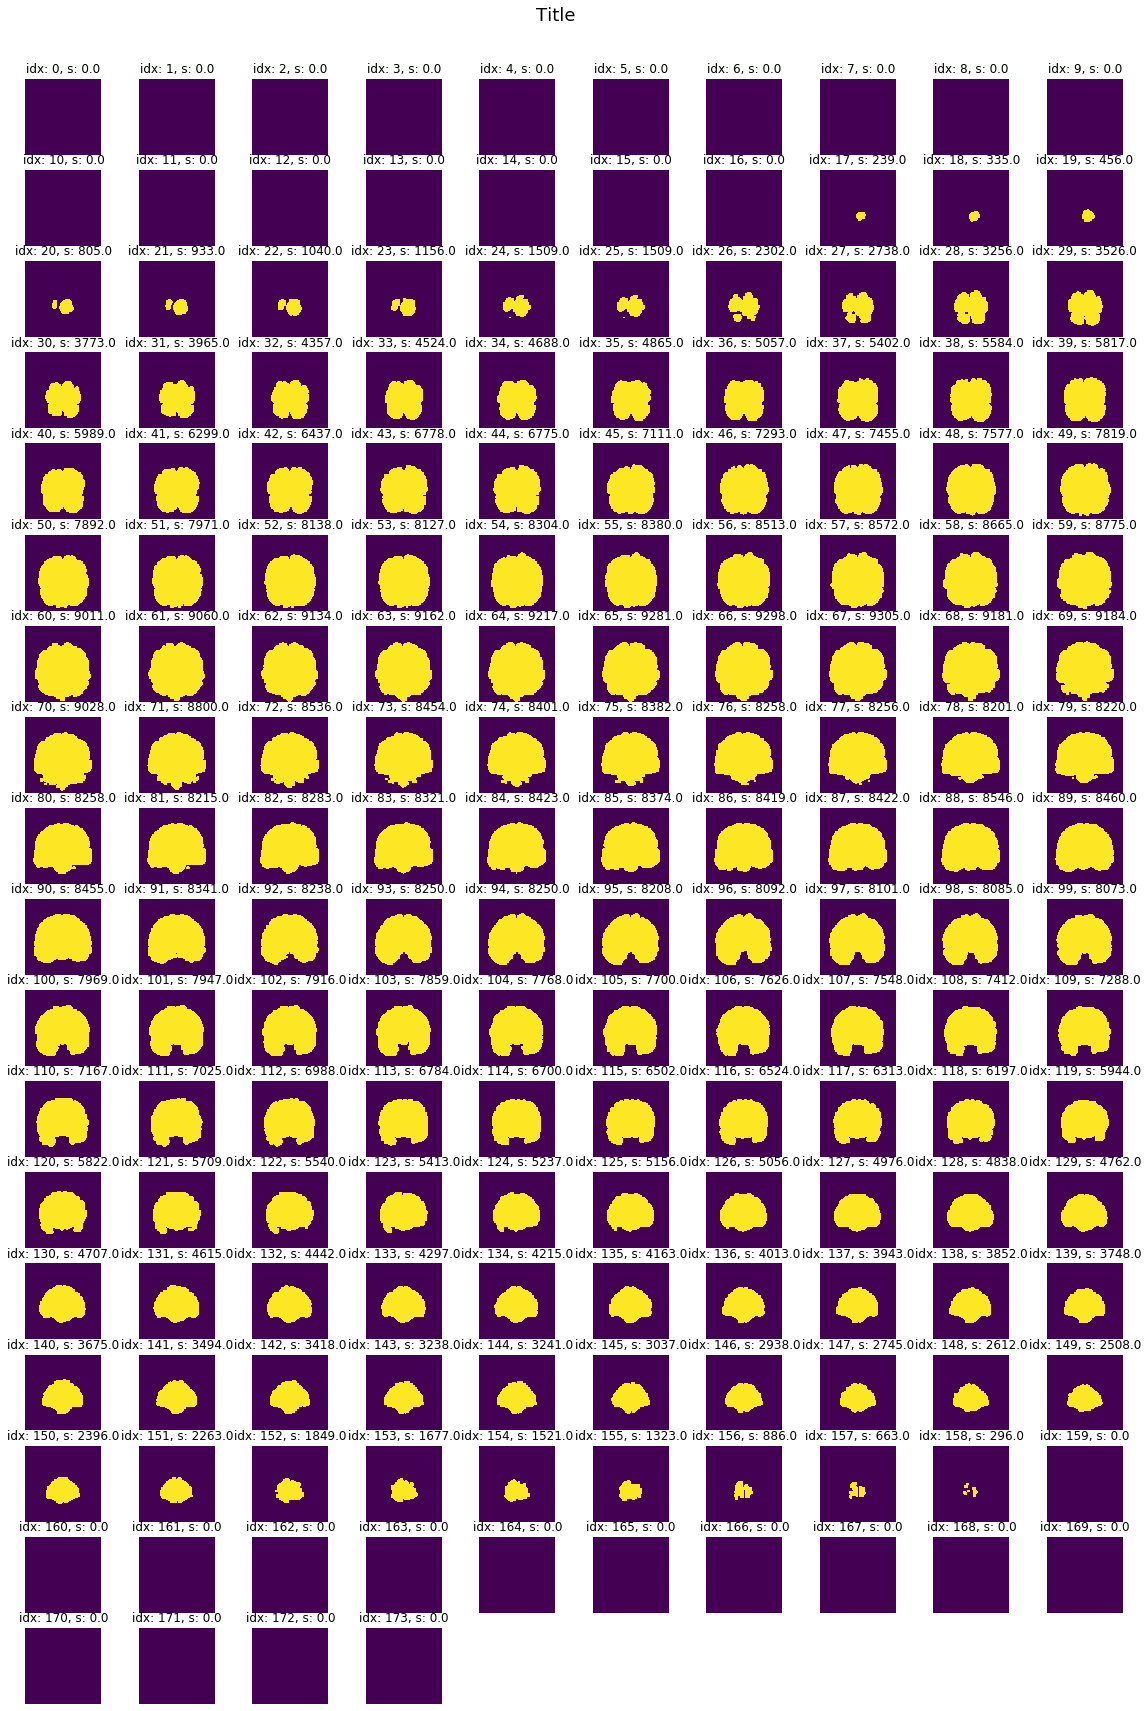

In [10]:
coronal_masks = [mask.T for mask in brain_mask.transpose(1, 0, 2)]
print(len(coronal_masks))
titles = ["idx: {}, s: {}".format(idx, mask.sum()) for idx, mask in enumerate(coronal_masks)]
vis_utils.show_tiled_images(coronal_masks, titles, n_rows=30, n_cols=10, figsize=(20, 50))

## IMPORTANT!!!

Look at the images below, everything except five tracts are considered as tracts.
Tracts that are not labeled should be considered as 'other' class.

In [4]:
# # labels = ['Background', 'CG_left', 'CG_right', 'CST_left', 'CST_right', 'FX_left', 'FX_right', 'CC']
# labels = ['Background', 'Other', 'CG', 'CST', 'FX', 'CC']

# x_coord = 72
# y_coord = 87
# z_coord = 72
# t = 0 # time

# suptitles=["Binary Mask for: "]
# ml_masks_list = [ml_masks]
# # vis_utils.visualize_masks(dmri_data,
# #                           ml_masks_list,
# #                           labels,
# #                           x_coord,
# #                           y_coord,
# #                           z_coord,
# #                           t,
# #                           suptitles,
# #                           mask_color='red')
# # images = [slc.T for slc in ml_masks[:, :, :, 0]]
# images = [slc.T for slc in ml_masks.transpose(1, 0, 2, 3)[:, :, :, 1]]
# titles = [str(c) for c in range(174)]
# vis_utils.show_tiled_images(images, titles, n_rows=30, n_cols=10, figsize=(20, 50))